#importing basic packages

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
os.chdir("F:\PYTHON\python statistics and ML classes notes\Machine Learning Classes\Supevice Machine Learning\projects in jupyter\credit card classification problem")

In [5]:
dataset = pd.read_csv('Credit_Risk_XTrain.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Pre-processing part

In [6]:
# Part 1 - Check missing values
dataset.isnull().sum() / len(dataset)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [9]:
#missing values

# Gender  - char             2.117264
# Married  - char            0.488599
# Dependents  - char         2.442997
# Self_Employed  - char      5.211726
# LoanAmount    - float       3.583062
# Loan_Amount_Term   - float   2.280130
# Credit_History  - float     8.143322


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
dataset['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [12]:
dataset['Gender'] = dataset['Gender'].fillna('Male')

In [13]:
dataset['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [14]:
dataset['Married'] = dataset['Married'].fillna('Yes')

In [15]:
dataset['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
dataset['Dependents'] = dataset['Dependents'].fillna('0')

In [17]:
dataset['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
dataset['Self_Employed'] = dataset['Self_Employed'].fillna('No')

In [19]:
dataset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:ylabel='LoanAmount'>

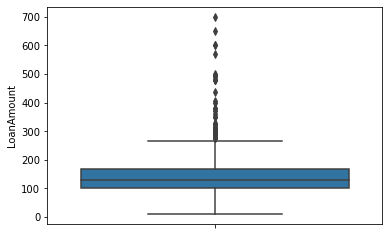

In [20]:
sns.boxplot(y='LoanAmount', data=dataset)

In [21]:
dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].median())

<AxesSubplot:ylabel='Loan_Amount_Term'>

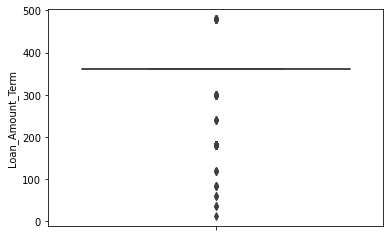

In [22]:
sns.boxplot(y='Loan_Amount_Term', data=dataset)

In [23]:
#further detailing for the clearence.....
dataset['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [24]:
dataset['Loan_Amount_Term'].median()

360.0

In [25]:
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].median())

<AxesSubplot:ylabel='Credit_History'>

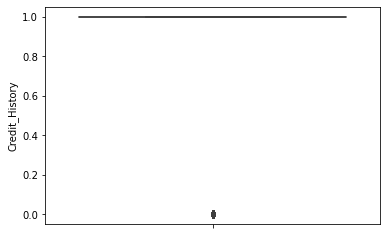

In [26]:
sns.boxplot(y='Credit_History', data=dataset)

In [27]:
dataset['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [28]:
dataset['Credit_History'] = dataset['Credit_History'].fillna(1.0)

In [29]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [31]:
# pre-processing part 2 - Encoding concept
dataset = dataset.iloc[:,1:]

#removing loan id because of no use

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [33]:
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Gender'] = dataset['Gender'].cat.codes
dataset = pd.get_dummies(dataset, columns=['Gender'])

In [34]:
dataset['Married'] = dataset['Married'].astype('category')
dataset['Married'] = dataset['Married'].cat.codes
dataset = pd.get_dummies(dataset, columns=['Married'])

In [35]:
dataset['Dependents'] = dataset['Dependents'].astype('category')
dataset['Dependents'] = dataset['Dependents'].cat.codes
dataset = pd.get_dummies(dataset, columns=['Dependents'])

In [36]:
dataset['Education'] = dataset['Education'].astype('category')
dataset['Education'] = dataset['Education'].cat.codes
dataset = pd.get_dummies(dataset, columns=['Education'])

In [37]:
dataset['Self_Employed'] = dataset['Self_Employed'].astype('category')
dataset['Self_Employed'] = dataset['Self_Employed'].cat.codes
dataset = pd.get_dummies(dataset, columns=['Self_Employed'])

In [38]:
dataset['Property_Area'] = dataset['Property_Area'].astype('category')
dataset['Property_Area'] = dataset['Property_Area'].cat.codes
dataset = pd.get_dummies(dataset, columns=['Property_Area'])

In [39]:
dataset['Loan_Status'] = dataset['Loan_Status'].astype('category')
dataset['Loan_Status'] = dataset['Loan_Status'].cat.codes

In [40]:
dataset.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_0',
       'Gender_1', 'Married_0', 'Married_1', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3', 'Education_0', 'Education_1',
       'Self_Employed_0', 'Self_Employed_1', 'Property_Area_0',
       'Property_Area_1', 'Property_Area_2'],
      dtype='object')

In [41]:
# dummy var - n-1
# 'Gender_0','Married_0','Married_0','Education_0','Education_0','Education_0','Dependents_0','Self_Employed_0','Property_Area_0'

In [42]:
dataset = dataset.drop(['Gender_0','Married_0','Married_0','Education_0','Education_0','Education_0','Dependents_0','Self_Employed_0','Property_Area_0'], axis=1)

In [43]:
dataset.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_1,Married_1,Dependents_1,Dependents_2,Dependents_3,Education_1,Self_Employed_1,Property_Area_1,Property_Area_2
0,5849,0.0,128.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,0,1


In [44]:
#spliting the data into x and y
x = dataset.drop(['Loan_Status'],axis=1)
y = dataset['Loan_Status']

In [46]:
x.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_1,Married_1,Dependents_1,Dependents_2,Dependents_3,Education_1,Self_Employed_1,Property_Area_1,Property_Area_2
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1


In [47]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int8

In [48]:
# pre-processing - check imbalance dataset
dataset['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [49]:
192*2
# oversampling method / SMOTE techniques
# majority = 422
# minority = 192
# majority >= 2*minority
# 422 > 2*192
# therefore the data is imblance

384

# Support Vecot Machine
## Kernel - "linear"
## Kernel - "sigmoid"
## Kernel - "polynomial"
## Kernel - "rbf"
### Kernel - approach

In [50]:
from sklearn.svm import SVC
classifier_svm_linear = SVC(kernel = 'linear')
classifier_svm_linear.fit(x,y)

SVC(kernel='linear')

In [51]:
classifier_svm_sigmoid = SVC(kernel = 'sigmoid')
classifier_svm_sigmoid.fit(x,y)

SVC(kernel='sigmoid')

In [52]:
classifier_svm_poly = SVC(kernel = 'poly')
classifier_svm_poly.fit(x,y)

SVC(kernel='poly')

In [53]:
classifier_svm_rbf = SVC(kernel = 'rbf')
classifier_svm_rbf.fit(x,y)

SVC()

# Test Dataset 

In [54]:
# To predict model, we have to download validation_test_dataset
test = pd.read_csv('Credit_Risk_Validate_data_XTEST.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,outcome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,N


In [55]:
test.isnull().sum() 

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
outcome               0
dtype: int64

In [56]:
test.isnull().sum() / len(test)*100

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
outcome              0.000000
dtype: float64

In [57]:
#filling the null values
test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [58]:
test['Gender'] = test['Gender'].fillna('Male')

In [59]:
test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [60]:
test['Dependents'] = test['Dependents'].fillna('0')

In [61]:
test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [62]:
test['Self_Employed'] = test['Self_Employed'].fillna('No')

<AxesSubplot:ylabel='LoanAmount'>

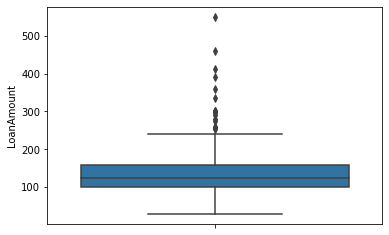

In [63]:
sns.boxplot(y='LoanAmount', data=test)

In [64]:
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())

In [65]:
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].median())

In [66]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
outcome              0
dtype: int64

In [67]:
#removing loan id because of no use
test = test.iloc[:,1:]

In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
 11  outcome            367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [69]:
test['Gender'] = test['Gender'].astype('category')
test['Gender'] = test['Gender'].cat.codes
test = pd.get_dummies(test, columns=['Gender'])

In [70]:
test['Married'] = test['Married'].astype('category')
test['Married'] = test['Married'].cat.codes
test = pd.get_dummies(test, columns=['Married'])

In [71]:
test['Dependents'] = test['Dependents'].astype('category')
test['Dependents'] = test['Dependents'].cat.codes
test = pd.get_dummies(test, columns=['Dependents'])

In [72]:
test['Education'] = test['Education'].astype('category')
test['Education'] = test['Education'].cat.codes
test = pd.get_dummies(test, columns=['Education'])

In [73]:
test['Self_Employed'] = test['Self_Employed'].astype('category')
test['Self_Employed'] = test['Self_Employed'].cat.codes
test = pd.get_dummies(test, columns=['Self_Employed'])

In [74]:
test['Property_Area'] = test['Property_Area'].astype('category')
test['Property_Area'] = test['Property_Area'].cat.codes
test = pd.get_dummies(test, columns=['Property_Area'])

In [75]:
test['outcome'] = test['outcome'].astype('category')
test['outcome'] = test['outcome'].cat.codes

In [76]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,outcome,Gender_0,Gender_1,Married_0,Married_1,...,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Property_Area_0,Property_Area_1,Property_Area_2
0,5720,0,110.0,360.0,1.0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1


In [77]:
test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'outcome', 'Gender_0', 'Gender_1',
       'Married_0', 'Married_1', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3', 'Education_0', 'Education_1',
       'Self_Employed_0', 'Self_Employed_1', 'Property_Area_0',
       'Property_Area_1', 'Property_Area_2'],
      dtype='object')

In [78]:
test = test.drop(['Gender_0','Married_0','Dependents_0','Education_0','Self_Employed_0','Property_Area_0'], axis=1)

In [79]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,outcome,Gender_1,Married_1,Dependents_1,Dependents_2,Dependents_3,Education_1,Self_Employed_1,Property_Area_1,Property_Area_2
0,5720,0,110.0,360.0,1.0,1,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,1.0,1,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,0,0,0,0,1,0,0,1


In [80]:
#spliting the variable into x and y
x_test = test.drop(['outcome'], axis=1)
y_test = test['outcome']

In [82]:
x_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_1,Married_1,Dependents_1,Dependents_2,Dependents_3,Education_1,Self_Employed_1,Property_Area_1,Property_Area_2
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1


In [83]:
y_test.head()

0    1
1    1
2    1
3    1
4    0
Name: outcome, dtype: int8

# Prediction

In [84]:
y_pred_linear = classifier_svm_linear.predict(x_test)

In [85]:
y_pred_sigmoid = classifier_svm_sigmoid.predict(x_test)

In [86]:
y_pred_poly = classifier_svm_poly.predict(x_test)

In [87]:
y_pred_rbf = classifier_svm_rbf.predict(x_test)

# Evaluation

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [89]:
print(classification_report(y_test, y_pred_linear))
print("\n")
print(classification_report(y_test, y_pred_sigmoid))
print('\n')
print(classification_report(y_test, y_pred_poly))
print('\n')
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80        77
           1       0.92      0.99      0.96       290

    accuracy                           0.93       367
   macro avg       0.93      0.84      0.88       367
weighted avg       0.93      0.93      0.92       367



              precision    recall  f1-score   support

           0       0.24      0.26      0.25        77
           1       0.80      0.78      0.79       290

    accuracy                           0.67       367
   macro avg       0.52      0.52      0.52       367
weighted avg       0.68      0.67      0.68       367



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.79      1.00      0.88       290

    accuracy                           0.79       367
   macro avg       0.39      0.50      0.44       367
weighted avg       0.62      0.79      0.70       367



             

C:\Users\yasho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yasho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yasho\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
print(confusion_matrix(y_test, y_pred_linear))
print("\n")
print(confusion_matrix(y_test, y_pred_sigmoid))
print('\n')
print(confusion_matrix(y_test, y_pred_poly))
print('\n')
print(confusion_matrix(y_test, y_pred_rbf))

[[ 53  24]
 [  3 287]]


[[ 20  57]
 [ 63 227]]


[[  0  77]
 [  1 289]]


[[  0  77]
 [  0 290]]


In [91]:
print(accuracy_score(y_test, y_pred_linear))
print("\n")
print(accuracy_score(y_test, y_pred_sigmoid))
print('\n')
print(accuracy_score(y_test, y_pred_poly))
print('\n')
print(accuracy_score(y_test, y_pred_rbf))

0.9264305177111717


0.6730245231607629


0.7874659400544959


0.7901907356948229


In [92]:
y_pred_linear_train = classifier_svm_linear.predict(x)

In [93]:
print(accuracy_score(y, y_pred_linear_train))

0.8013029315960912


In [94]:
# Kernel = linear is the best one as we got 
# training accuracy = 80%
# test accuracy = 92.6%

# Final evaluation

In [95]:
final_report = pd.read_csv('Credit_Risk_Test_data.csv')
final_report.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [96]:
final_report.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [97]:
#filling the null values
final_report['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [98]:
final_report['Gender']= final_report['Gender'].fillna('Male')

In [99]:
final_report['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [101]:
final_report['Dependents']= final_report['Dependents'].fillna('0')

In [102]:
final_report['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [105]:
final_report['Self_Employed']= final_report['Self_Employed'].fillna('No')

<AxesSubplot:ylabel='LoanAmount'>

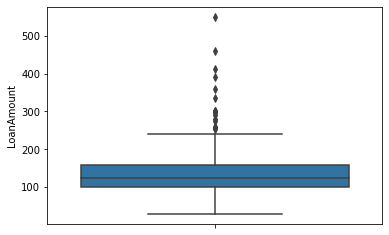

In [106]:
sns.boxplot(y='LoanAmount', data=final_report)

In [107]:
final_report['LoanAmount'] = final_report['LoanAmount'].fillna(final_report['LoanAmount'].median())

<AxesSubplot:ylabel='Credit_History'>

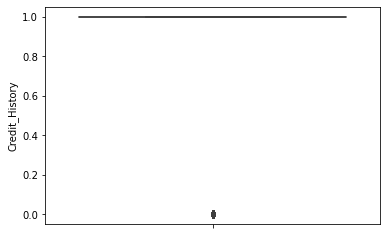

In [108]:
sns.boxplot(y='Credit_History', data=final_report)

In [109]:
final_report['Loan_Amount_Term'] = final_report['Loan_Amount_Term'].fillna(final_report['Loan_Amount_Term'].median())
final_report['Credit_History'] = final_report['Credit_History'].fillna(final_report['Credit_History'].median())

In [110]:
final_report.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [111]:
final_report= final_report.iloc[:,1:]

In [112]:
final_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [113]:
final_report['Gender'] = final_report['Gender'].astype('category')
final_report['Gender'] = final_report['Gender'].cat.codes
final_report = pd.get_dummies(final_report, columns=['Gender'])

In [114]:
final_report['Married'] = final_report['Married'].astype('category')
final_report['Married'] = final_report['Married'].cat.codes
final_report = pd.get_dummies(final_report, columns=['Married'])

In [115]:
final_report['Dependents'] = final_report['Dependents'].astype('category')
final_report['Dependents'] = final_report['Dependents'].cat.codes
final_report = pd.get_dummies(final_report, columns=['Dependents'])

In [116]:
final_report['Education'] = final_report['Education'].astype('category')
final_report['Education'] = final_report['Education'].cat.codes
final_report = pd.get_dummies(final_report, columns=['Education'])

In [117]:
final_report['Self_Employed'] = final_report['Self_Employed'].astype('category')
final_report['Self_Employed'] = final_report['Self_Employed'].cat.codes
final_report = pd.get_dummies(final_report, columns=['Self_Employed'])

In [118]:
final_report['Property_Area'] = final_report['Property_Area'].astype('category')
final_report['Property_Area'] = final_report['Property_Area'].cat.codes
final_report = pd.get_dummies(final_report, columns=['Property_Area'])

In [120]:
final_report.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_0,Gender_1,Married_0,Married_1,Dependents_0,...,Dependents_3,Dependents_4,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Self_Employed_2,Property_Area_0,Property_Area_1,Property_Area_2
0,5720,0,110.0,360.0,1.0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [122]:
final_report.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_0', 'Gender_1',
       'Married_0', 'Married_1', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3', 'Dependents_4', 'Education_0',
       'Education_1', 'Self_Employed_0', 'Self_Employed_1', 'Self_Employed_2',
       'Property_Area_0', 'Property_Area_1', 'Property_Area_2'],
      dtype='object')

In [ ]:
#dummy variable - n-1
#'Gender_0','Married_0','Dependents_0','Education_0','Self_Employed_0','Property_Area_0',

In [123]:
final_report = final_report.drop(['Gender_0','Married_0','Dependents_0','Education_0','Self_Employed_0','Property_Area_0'], axis=1)

In [124]:
final_report.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_1,Married_1,Dependents_1,Dependents_2,Dependents_3,Dependents_4,Education_1,Self_Employed_1,Self_Employed_2,Property_Area_1,Property_Area_2
0,5720,0,110.0,360.0,1.0,1,1,1,0,0,0,0,1,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,0,1,0,0,0,1,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,0,1,0,0,1,0,0,1
3,2340,2546,100.0,360.0,1.0,1,1,0,0,1,0,0,1,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,1,0,0,0,1,1,0,0,1
